In [41]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import stopwordsiso
import unidecode
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cv = CountVectorizer(ngram_range=(1,1))

In [42]:
df = pd.read_csv('english_indian_data.csv') 

In [43]:
df.shape[0]

44120

In [44]:
def preProcessing(data: pd.DataFrame):
    
    '''Returns X and y'''
    
    X = data["Text"]
    y = data["Language"]
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    with open('label_encoder_eng_ind', 'wb') as fil:
        pickle.dump(le, fil)
    
    data_list = []
    
    for text in X:
        text = re.sub(r'[!@#$(),n"%^*.?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)
    
    return X, y

In [45]:
X, y = preProcessing(df)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, stratify=y)

In [47]:
x_train.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)

In [48]:
def partialFit_predict(X, y, n_batches: int, n_iter: int):
    
    def batches(l, n):
        for i in range(0, len(l), n):
            yield l[i:i+n]
    
    global cv
    i = 0
    shuffledRange = list(range(len(X)))
    for _ in range(n_iter):
        random.shuffle(shuffledRange)
        shuffledX = [X.loc[i] for i in shuffledRange]
        shuffledY = [y[i] for i in shuffledRange]
        for batch in batches(range(len(X)), n_batches):
            model = MultinomialNB()
        
            i = i + 1
            print(i)
        
            try:
                x = cv.fit_transform(shuffledX[batch[0]:batch[-1]+1]).toarray()
                print(X.shape)
                model.partial_fit(x, shuffledY[batch[0]:batch[-1]+1], classes=np.unique(y))
            except:
                x = cv.transform(shuffledX[batch[0]:batch[-1]+1]).toarray()
                model.partial_fit(x, shuffledY[batch[0]:batch[-1]+1], classes=np.unique(y))
    
    with open('partial_fit_model_eng_ind', 'wb') as files:
        pickle.dump(model, files)

    print('--- Training is done! ---\n\n')
    global y_test, x_test
    x_test = cv.transform(x_test).toarray()
    
    with open('count_vectorizer_eng_ind', 'wb') as f:
        pickle.dump(cv, f)
    
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'''Accuracy score: {ac}\n\n''', cr)
    print(sns.heatmap(cm, annot=True))

1
(39708,)
2
(39708,)
3
(39708,)
4
(39708,)
--- Training is done! ---


Accuracy score: 0.928377153218495

               precision    recall  f1-score   support

           0       0.98      0.88      0.92      1463
           1       0.99      0.92      0.95      1448
           2       0.84      0.99      0.91      1501

    accuracy                           0.93      4412
   macro avg       0.94      0.93      0.93      4412
weighted avg       0.94      0.93      0.93      4412

AxesSubplot(0.125,0.125;0.62x0.755)


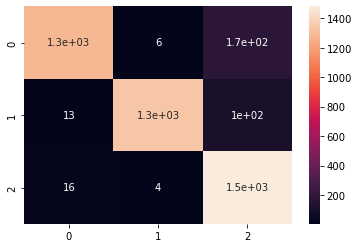

In [49]:
partialFit_predict(x_train, y_train, 10000, n_iter=1)